## Imports necesarios

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot, pylab
import os
from helper import *
from tester import *

## Compilar binario

In [3]:
!make

g++ ./src/tp1.cpp -o ./tp1 -O3


## Correr tests de la catedra (descomentar)

In [37]:
## Chequear método diff de helper.py.
## Esto verifica que nuestra soluciones no tengan una distancia mayor a 
## 1e-4 de las que nos dieron.
#KK run_each()

## Funciones que crean tests (descomentar)

In [38]:
## Crear carpeta de tests
# !mkdir -p ./our_tests
## Tests ralos
# sparse_tests_extra_links()
## Test de grafo denso
#dense_test()
## Crear carpetas para los distintos valores de p:
# !bash && cd our_tests && for i in 0.3 0.5 0.7 0.9; do mkdir -p "${i}" && cp ./*.txt "${i}"; done

## Ejecutar tests (descomentar)

In [5]:
## Este tarda....
#run_our_tests() 

## CSV con los resultados de los tests bajo /our_tests

In [4]:
results = pd.read_csv('./results.csv')
results

,n,m,sparsiness,number,p,time,name
0,1000,45000,97,4,0.3,7.866825,sparseextra
1,100,1600,99,2,0.3,0.023069,sparseextra
2,200,2000,95,1,0.3,0.090734,sparse
3,50,875,95,0,0.3,0.008572,sparseextra
4,1000,10000,99,3,0.3,2.484072,sparse
...,...,...,...,...,...,...,...
1919,1000,30000,97,0,0.9,10.915240,sparse30
1920,100,300,97,4,0.9,0.014781,sparse30
1921,1000,60000,97,3,0.9,23.185981,sparseextra30
1922,100,3300,97,3,0.9,0.032477,sparseextra30


## Código para comprobar nuestra hipótesis de los 15 primeros

In [11]:
rankings = read_test_out(f"./our_tests/0.9/1000_99_1_sparse30.txt.out")
df_sparse = pd.DataFrame(rankings, columns = ["x_i", "Rank"])
first_15 = ["15 particulares" if x < 15 else "Las demás" for x in range(1000)]
df_sparse["Páginas"] = first_15
df_sparse

,x_i,Rank,Páginas
0,1,0.001192,15 particulares
1,2,0.000860,15 particulares
2,3,0.000698,15 particulares
3,4,0.000764,15 particulares
4,5,0.000749,15 particulares
...,...,...,...
995,996,0.000985,Las demás
996,997,0.000957,Las demás
997,998,0.001276,Las demás
998,999,0.000610,Las demás


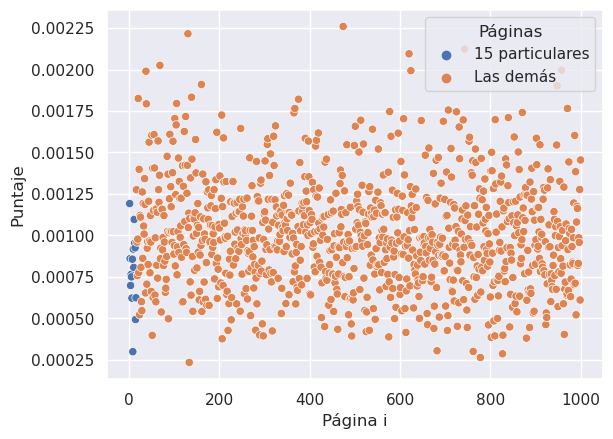

In [12]:
uniform_plot = sb.scatterplot(df_sparse, x="x_i", y="Rank", hue="Páginas") 
uniform_plot.set(xlabel="Página i", ylabel="Puntaje")
matplotlib.pyplot.savefig('n_1000_ranking.svg')

In [13]:
rankings = read_test_out(f"./our_tests/0.9/1000_99_1_sparseextra30.txt.out")
df_extra = pd.DataFrame(rankings, columns = ["x_i", "Rank"])
first_15 = ["15 particulares" if x < 15 else "Las demás" for x in range(1000)]
df_extra["Páginas"] = first_15
df_extra

,x_i,Rank,Páginas
0,1,0.023054,15 particulares
1,2,0.023417,15 particulares
2,3,0.022418,15 particulares
3,4,0.022848,15 particulares
4,5,0.022455,15 particulares
...,...,...,...
995,996,0.000217,Las demás
996,997,0.000251,Las demás
997,998,0.000410,Las demás
998,999,0.000330,Las demás


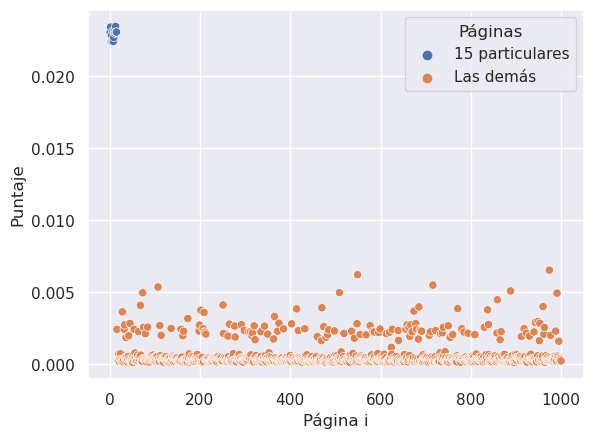

In [14]:
uniform_plot = sb.scatterplot(df_extra, x="x_i", y="Rank", hue="Páginas") 
uniform_plot.set(xlabel="Página i", ylabel="Puntaje")
matplotlib.pyplot.savefig('n_1000_ranking_extra.svg')

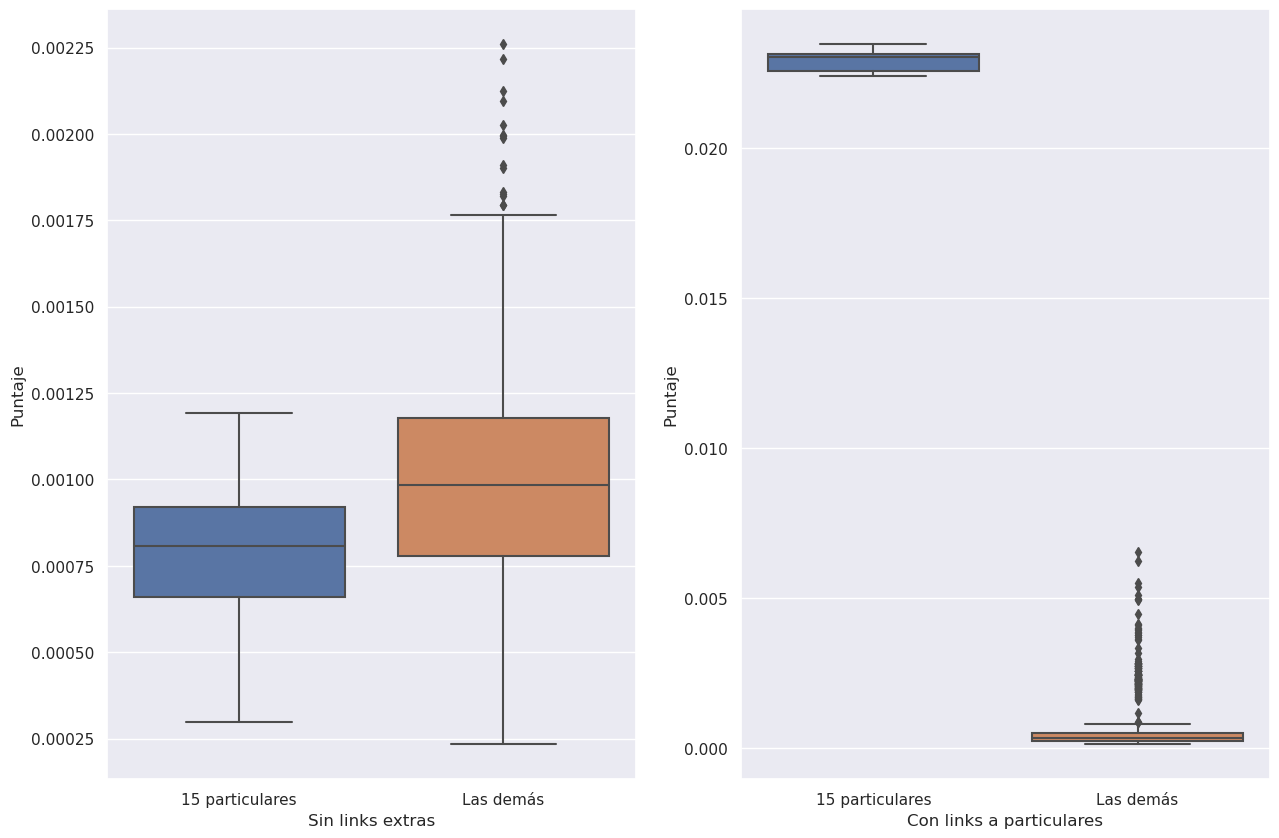

In [17]:
sb.set_theme()
fig, axes = matplotlib.pyplot.subplots(1, 2, figsize=(15,10))
left = sb.boxplot(df_sparse, x="Páginas", y="Rank", ax=axes[0]) 
left.set(xlabel="Sin links extras", ylabel="Puntaje")
right = sb.boxplot(df_extra, x="Páginas", y="Rank", ax=axes[1])
right.set(xlabel="Con links a particulares", ylabel="Puntaje")
matplotlib.pyplot.savefig('comparing_sparse_and_sparsextra_2.svg')

In [19]:
rankings = read_test_out(f"./our_tests/0.9/1000_99_3_fewimportant.txt.out")
df_few = pd.DataFrame(rankings, columns = ["x_i", "Rank"])
important = []
for x in range(1000):
    if(x < 15):
        str = "15 particulares"
        if(x == 2 or x == 4 or x == 6):
            str = "Página 3, 5 o 7"
    else:
        str = "Las demás"
    important.append(str)
df_few["Páginas"] = important
df_few

,x_i,Rank,Páginas
0,1,0.000765,15 particulares
1,2,0.001041,15 particulares
2,3,0.001579,"Página 3, 5 o 7"
3,4,0.000793,15 particulares
4,5,0.000646,"Página 3, 5 o 7"
...,...,...,...
995,996,0.000971,Las demás
996,997,0.000990,Las demás
997,998,0.001037,Las demás
998,999,0.001192,Las demás


In [20]:
rankings = read_test_out(f"./our_tests/0.9/1000_99_3_fewimportantextra.txt.out")
df_fewextra = pd.DataFrame(rankings, columns = ["x_i", "Rank"])
df_fewextra["Páginas"] = important
df_fewextra

,x_i,Rank,Páginas
0,1,0.021289,15 particulares
1,2,0.019439,15 particulares
2,3,0.031876,"Página 3, 5 o 7"
3,4,0.018099,15 particulares
4,5,0.034114,"Página 3, 5 o 7"
...,...,...,...
995,996,0.000607,Las demás
996,997,0.000943,Las demás
997,998,0.000348,Las demás
998,999,0.000417,Las demás


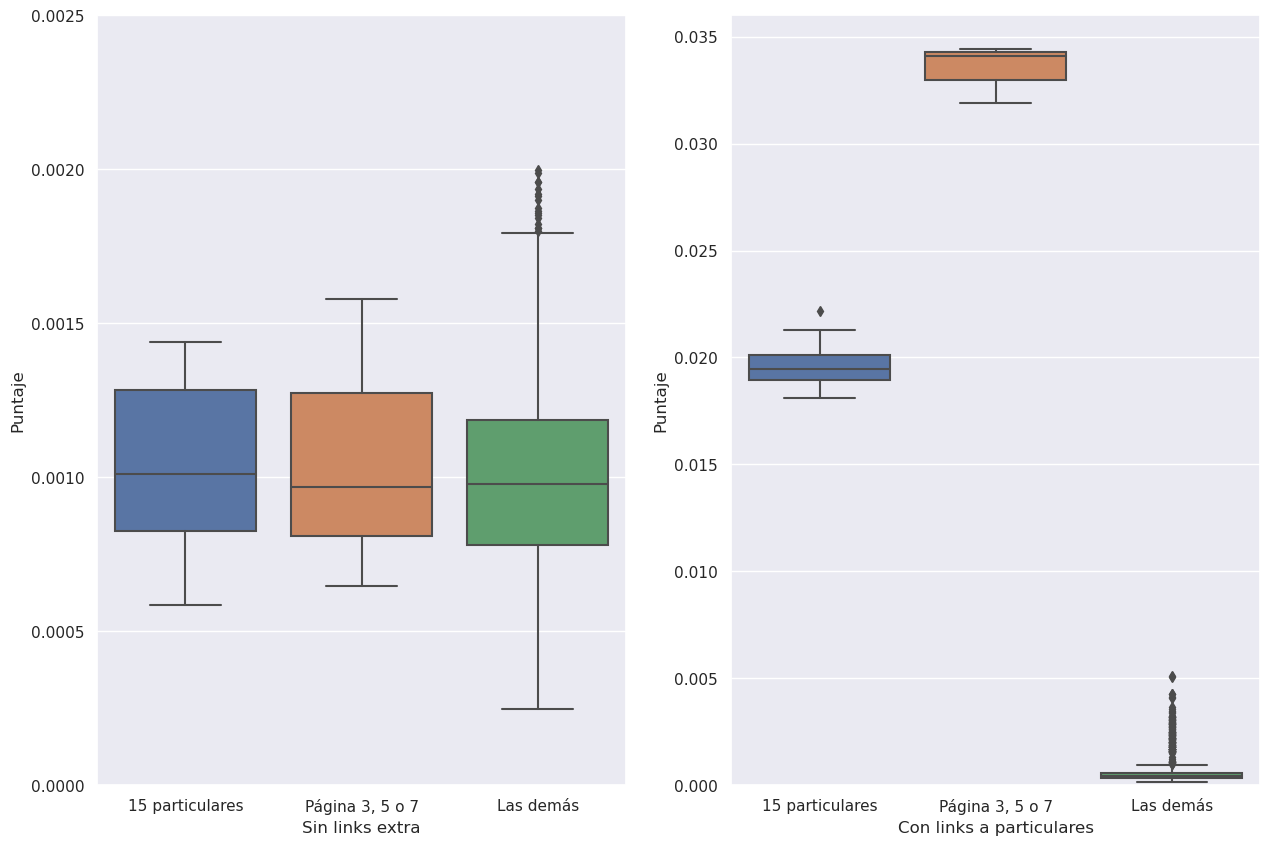

In [22]:
sb.set_theme()
fig, axes = matplotlib.pyplot.subplots(1, 2, figsize=(15,10))
left = sb.boxplot(df_few, x="Páginas", y="Rank", ax=axes[0]) 
left.set(xlabel="Sin links extra", ylabel="Puntaje")
axes[0].set_ylim((0.0, 0.0025))
right = sb.boxplot(df_fewextra, x="Páginas", y="Rank", ax=axes[1])
right.set(xlabel="Con links a particulares", ylabel="Puntaje")
axes[1].set_ylim((0.0, 0.036))
matplotlib.pyplot.savefig('comparing_with_few_important_2.svg')

In [24]:
rankings = read_test_out(f"./our_tests/0.9/300_97_2_sparse30.txt.out")
df_300_sparse = pd.DataFrame(rankings, columns = ["x_i", "Rank"])
df_300_sparse["Matriz"] = "Sparse"
df_300_sparse

,x_i,Rank,Matriz
0,1,0.004403,Sparse
1,2,0.003173,Sparse
2,3,0.001311,Sparse
3,4,0.003420,Sparse
4,5,0.002447,Sparse
...,...,...,...
295,296,0.002422,Sparse
296,297,0.001933,Sparse
297,298,0.002024,Sparse
298,299,0.002389,Sparse


In [25]:
rankings = read_test_out(f"./our_tests/0.9/300_50_2_density.txt.out")
df_300_dense = pd.DataFrame(rankings, columns = ["x_i", "Rank"])
df_300_dense["Matriz"] = "Dense"
df_300_dense

,x_i,Rank,Matriz
0,1,0.004080,Dense
1,2,0.003734,Dense
2,3,0.004207,Dense
3,4,0.003903,Dense
4,5,0.003591,Dense
...,...,...,...
295,296,0.003003,Dense
296,297,0.003039,Dense
297,298,0.003301,Dense
298,299,0.003125,Dense


In [26]:
combined = df_300_sparse.merge(df_300_dense, how="outer")
combined

,x_i,Rank,Matriz
0,1,0.004403,Sparse
1,2,0.003173,Sparse
2,3,0.001311,Sparse
3,4,0.003420,Sparse
4,5,0.002447,Sparse
...,...,...,...
595,296,0.003003,Dense
596,297,0.003039,Dense
597,298,0.003301,Dense
598,299,0.003125,Dense


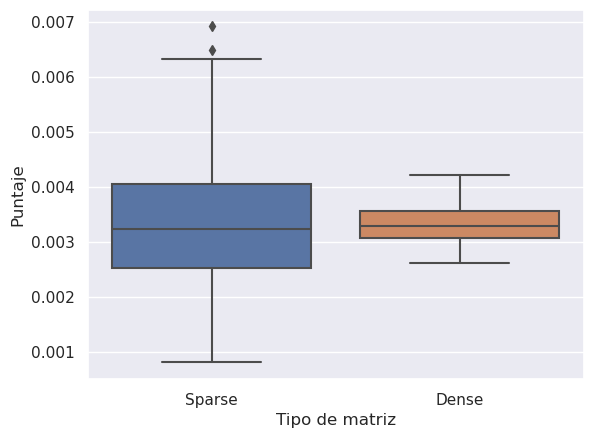

In [30]:
fig = sb.boxplot(combined, x="Matriz", y="Rank")
fig.set(xlabel="Tipo de matriz", ylabel="Puntaje")
matplotlib.pyplot.savefig('comparing_sparse_and_dense_2.svg')

In [25]:
sb.scatterplot(df, x="x_i", y="Rank")

NameError: name 'df' is not defined

In [26]:
benchmark_show_varying_p = results[["n", "time", "name", "p"]][results.name == "sparse"]
benchmark_show_varying_p

,n,time,name,p
2,200,0.090734,sparse,0.3
4,1000,2.484072,sparse,0.3
6,1000,5.072248,sparse,0.3
7,50,0.004911,sparse,0.3
10,300,0.302607,sparse,0.3
...,...,...,...,...
792,1000,21.284400,sparse,0.9
793,100,0.021599,sparse,0.9
796,200,0.096532,sparse,0.9
797,1000,11.054309,sparse,0.9


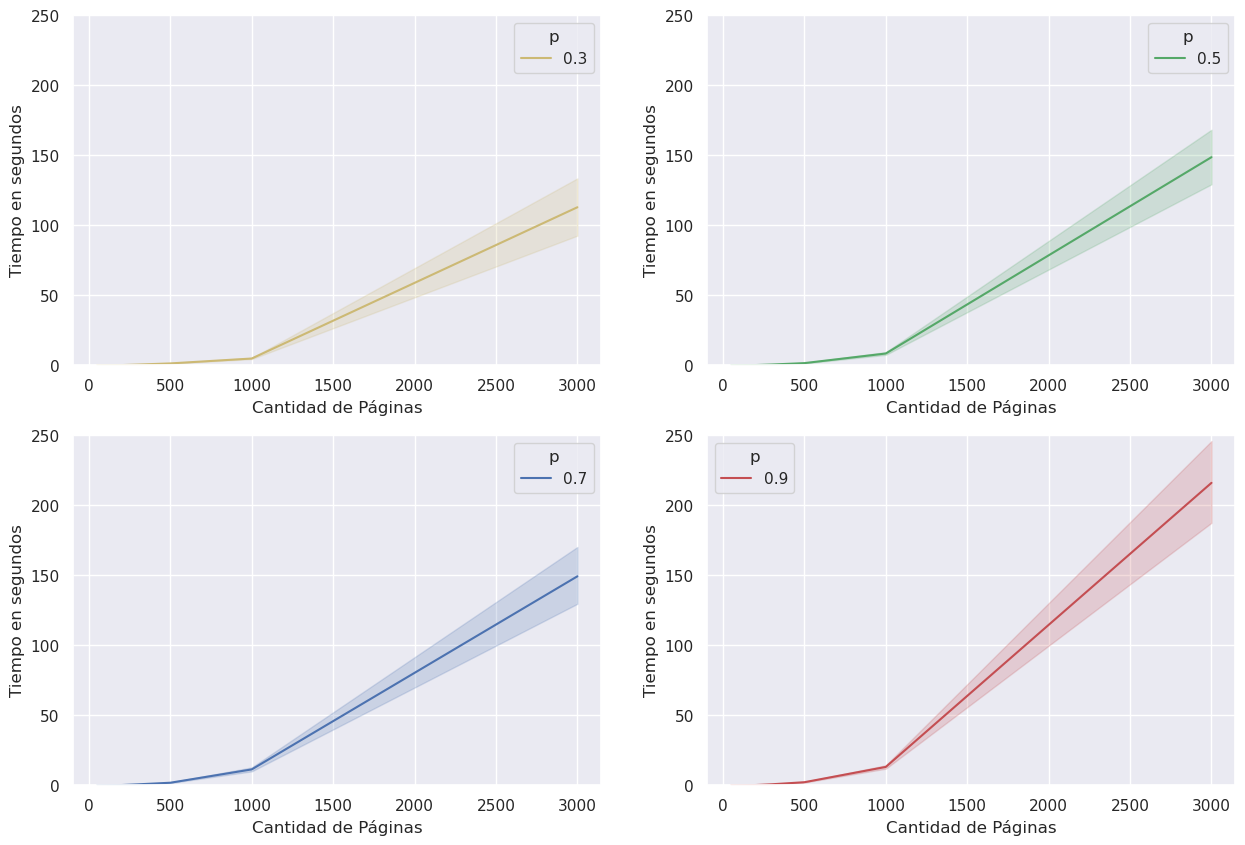

In [29]:
fig, axes = matplotlib.pyplot.subplots(2, 2, figsize=(15,10))
upper_left = sb.lineplot(results[results.p == 0.3], x="n", y="time", ax=axes[0][0], hue="p", palette=["y"]) 
upper_left.set(xlabel="Cantidad de Páginas", ylabel="Tiempo en segundos")

upper_right = sb.lineplot(results[results.p == 0.5], x="n", y="time", ax=axes[0][1], hue="p", palette=["g"]) 
upper_right.set(xlabel="Cantidad de Páginas", ylabel="Tiempo en segundos")

lower_left = sb.lineplot(results[results.p == 0.7], x="n", y="time", ax=axes[1][0], hue="p", palette=["b"]) 
lower_left.set(xlabel="Cantidad de Páginas", ylabel="Tiempo en segundos")

lower_right = sb.lineplot(results[results.p == 0.9], x="n", y="time", ax=axes[1][1], hue="p", palette=["r"]) 
lower_right.set(xlabel="Cantidad de Páginas", ylabel="Tiempo en segundos")

for (x, y) in [(0,0), (0, 1), (1, 0), (1,1)]:
    axes[x][y].set_ylim((0, 250))
matplotlib.pyplot.savefig('benchmark_show_varying_p_multiple.png')

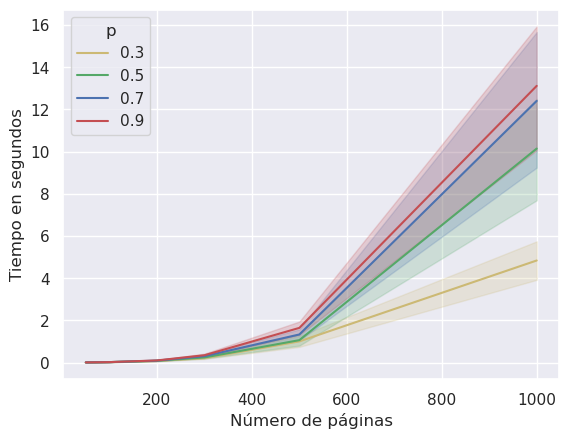

In [30]:
plot = sb.lineplot(benchmark_show_varying_p, x="n", y="time", hue="p", palette=['y', 'g', 'b', 'r'])
plot.set(xlabel="Número de páginas", ylabel="Tiempo en segundos")
matplotlib.pyplot.savefig('benchmark_show_varying_p.svg')

## Tests de P

In [32]:
def get_data_frames_for_p_test(n):
    dataframes = []
    for p in [0.3, 0.5, 0.7, 0.9]:
        out = read_test_out(f"./our_tests/{str(p)}/{str(n)}_97_3_sparse30.txt.out")
        df = pd.DataFrame(out, columns = ["x_i", "Rank"])
        dataframes.append(df)
    return dataframes

### N = 1000

In [43]:
out = read_test_out(f"./our_tests/0.3/1000_97_3_sparse30.txt.out")
dataframes_1000 = pd.DataFrame(out, columns = ["x_i", "Rank"])
dataframes_1000["p"] = "0.3"

out = read_test_out(f"./our_tests/0.5/1000_97_3_sparse30.txt.out")
df = pd.DataFrame(out, columns = ["x_i", "Rank"])
df["p"] = "0.5"
dataframes_1000 = dataframes_1000.merge(df, how="outer")

out = read_test_out(f"./our_tests/0.7/1000_97_3_sparse30.txt.out")
df = pd.DataFrame(out, columns = ["x_i", "Rank"])
df["p"] = "0.7"
dataframes_1000 = dataframes_1000.merge(df, how="outer")

out = read_test_out(f"./our_tests/0.9/1000_97_3_sparse30.txt.out")
df = pd.DataFrame(out, columns = ["x_i", "Rank"])
df["p"] = "0.9"
dataframes_1000 = dataframes_1000.merge(df, how="outer")

In [44]:
dataframes_1000

,x_i,Rank,p
0,1,0.001042,0.3
1,2,0.000957,0.3
2,3,0.001043,0.3
3,4,0.000964,0.3
4,5,0.001095,0.3
...,...,...,...
3995,996,0.001085,0.9
3996,997,0.001045,0.9
3997,998,0.000794,0.9
3998,999,0.000638,0.9


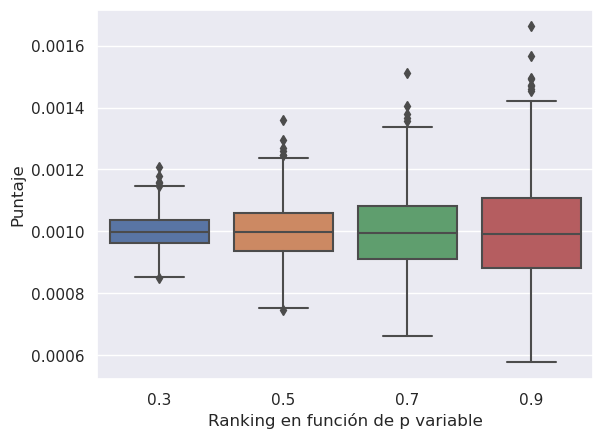

In [46]:
df_1000_p = dataframes_1000
fig = sb.boxplot(df_1000_p, x="p", y="Rank")
fig.set(xlabel="Ranking en función de p variable", ylabel="Puntaje")

matplotlib.pyplot.savefig('compare_p_with_n_1000_2.svg')

In [39]:
out = read_test_out(f"./our_tests/0.3/300_97_3_sparse30.txt.out")
dataframes_300 = pd.DataFrame(out, columns = ["x_i", "Rank"])
dataframes_300["p"] = "0.3"

out = read_test_out(f"./our_tests/0.5/300_97_3_sparse30.txt.out")
df = pd.DataFrame(out, columns = ["x_i", "Rank"])
df["p"] = "0.5"
dataframes_300 = dataframes_300.merge(df, how="outer")

out = read_test_out(f"./our_tests/0.7/300_97_3_sparse30.txt.out")
df = pd.DataFrame(out, columns = ["x_i", "Rank"])
df["p"] = "0.7"
dataframes_300 = dataframes_300.merge(df, how="outer")

out = read_test_out(f"./our_tests/0.9/300_97_3_sparse30.txt.out")
df = pd.DataFrame(out, columns = ["x_i", "Rank"])
df["p"] = "0.9"
dataframes_300 = dataframes_300.merge(df, how="outer")

dataframes_300

,x_i,Rank,p
0,1,0.003801,0.3
1,2,0.002867,0.3
2,3,0.003539,0.3
3,4,0.002904,0.3
4,5,0.003426,0.3
...,...,...,...
1195,296,0.001425,0.9
1196,297,0.003818,0.9
1197,298,0.003763,0.9
1198,299,0.002881,0.9


## N = 300

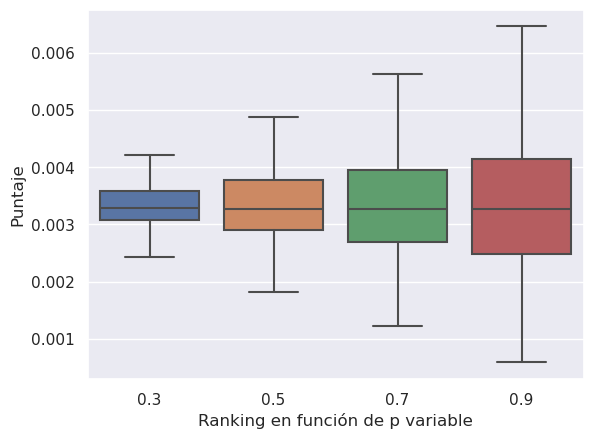

In [42]:
df_300_p = dataframes_300
fig = sb.boxplot(df_300_p, x="p", y="Rank")
fig.set(xlabel="Ranking en función de p variable", ylabel="Puntaje")

matplotlib.pyplot.savefig('compare_p_with_n_300_2.svg')

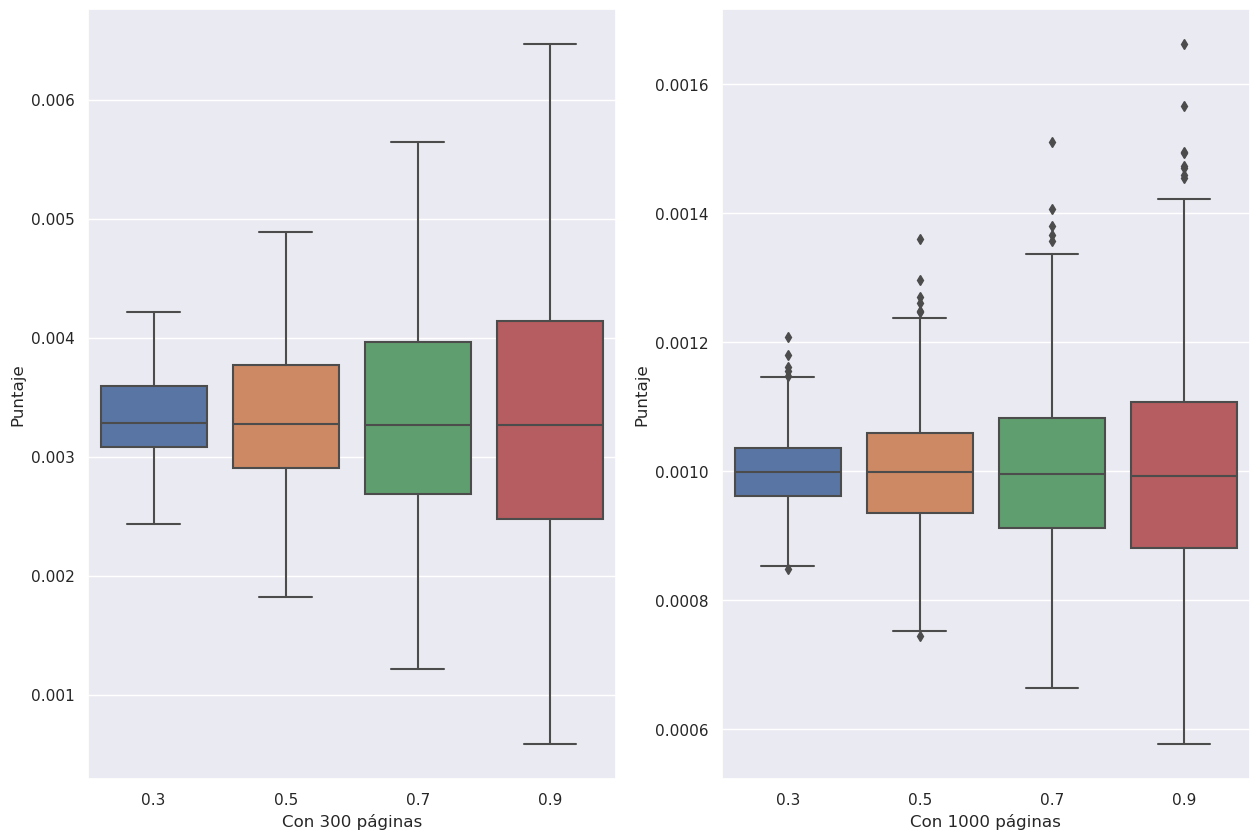

In [51]:
sb.set_theme()
fig, axes = matplotlib.pyplot.subplots(1, 2, figsize=(15,10))
left = sb.boxplot(dataframes_300, x="p", y="Rank", ax=axes[0])
left.set(xlabel="Con 300 páginas", ylabel="Puntaje")
#axes[0].set_ylim((0.0, 0.0025))
right = sb.boxplot(dataframes_1000, x="p", y="Rank", ax=axes[1])
right.set(xlabel="Con 1000 páginas", ylabel="Puntaje")
#axes[1].set_ylim((0.0, 0.036))
#fig.set(xlabel="Ranking en función de p variable")
matplotlib.pyplot.savefig('compare_p_with_n_300_and_1000.svg')

## Test cuantitativo

### Test 15 segundos:

In [69]:
## Obtengo archivo de tests
import os
test_file_our = os.getcwd() + f"/tests/test_15_segundos.txt"
test_file_original = os.getcwd() + f"/tests_catedra_original/test_15_segundos.txt"
test_15_segundos = read_test(test_file_our, test_file_original)

In [6]:
test_file_our = os.getcwd() + f"/tests/test_15_segundos.txt"
test_file_original = os.getcwd() + f"/tests_catedra_original/test_15_segundos.txt"
test_15_segundos = read_test(test_file_our, test_file_original)

diff_with_test_our = test_15_segundos.diff_solution_with_A_times_x()
diff_with_test_original = test_15_segundos.diff_catedra_with_A_times_x()


df_diff_15_our = pd.DataFrame([(indx, diff) for (indx, diff) in enumerate(diff_with_test_our)])
df_diff_15_original = pd.DataFrame([(indx, diff) for (indx, diff) in enumerate(diff_with_test_original)])


In [7]:
test_file_our = os.getcwd() + f"/tests/test_30_segundos.txt"
test_file_original = os.getcwd() + f"/tests_catedra_original/test_30_segundos.txt"
test_30_segundos = read_test(test_file_our, test_file_original)

diff_with_test_our = test_30_segundos.diff_solution_with_A_times_x()
diff_with_test_original = test_30_segundos.diff_catedra_with_A_times_x()


df_diff_30_our = pd.DataFrame([(indx, diff) for (indx, diff) in enumerate(diff_with_test_our)])
df_diff_30_original = pd.DataFrame([(indx, diff) for (indx, diff) in enumerate(diff_with_test_original)])

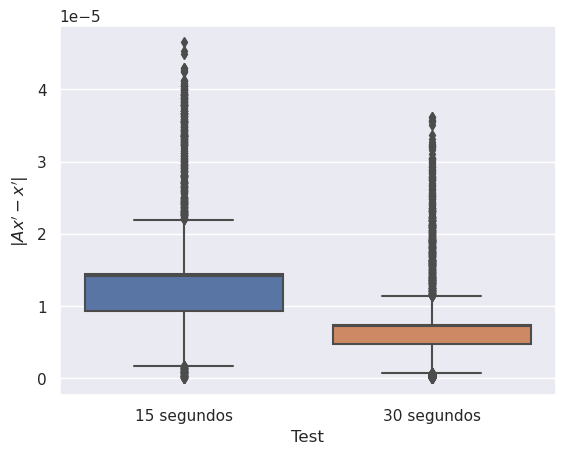

In [63]:
df_diff_15_our["Test"] = "15 segundos"
df_diff_30_our["Test"] = "30 segundos"
combined = df_diff_15_our.merge(df_diff_30_our, how="outer")
fig = sb.boxplot(combined, x="Test", y=1)
fig.set(xlabel="Test", ylabel="$|Ax'-x'|$")
matplotlib.pyplot.savefig("boxplot_15_vs_30_ax.svg")

[Text(0.5, 0, 'Test 15 segundos'), Text(0, 0.5, "$|Ax'-x'|$")]

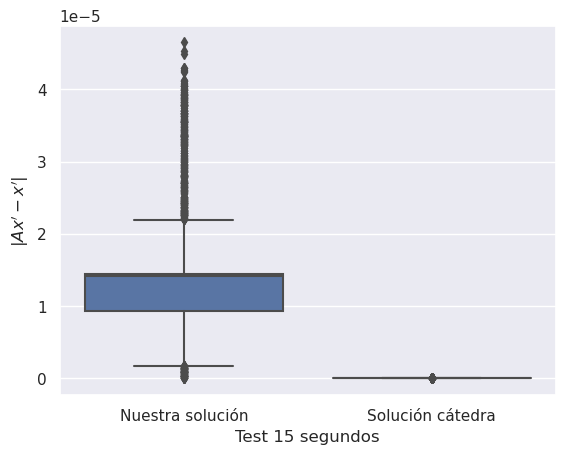

In [18]:
df_diff_15_our["Resultados"] = "Nuestra solución"
df_diff_15_original["Resultados"] = "Solución cátedra"
combined_15 = df_diff_15_our.merge(df_diff_15_original, how="outer")
fig = sb.boxplot(combined_15,x="Resultados", y=1)
fig.set(xlabel="Test 15 segundos", ylabel="$|Ax'-x'|$")
#matplotlib.pyplot.savefig("boxplot_our_vs_original_a_times_x.svg")

[Text(0.5, 0, 'Test 30 segundos'), Text(0, 0.5, "$|Ax'-x'|$")]

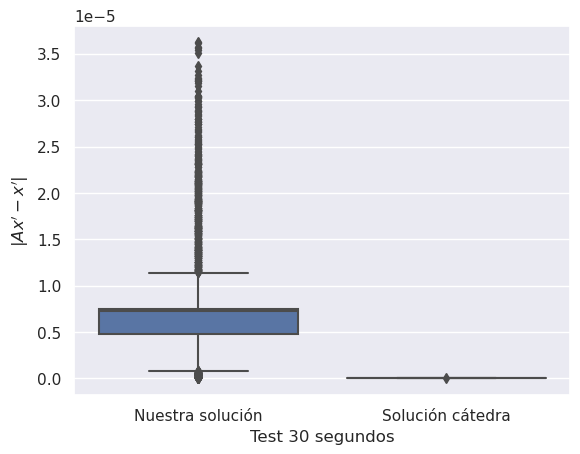

In [19]:
df_diff_30_our["Resultados"] = "Nuestra solución"
df_diff_30_original["Resultados"] = "Solución cátedra"
combined_30 = df_diff_30_our.merge(df_diff_30_original, how="outer")
fig = sb.boxplot(combined_30,x="Resultados", y=1)
fig.set(xlabel="Test 30 segundos", ylabel="$|Ax'-x'|$")
#matplotlib.pyplot.savefig("boxplot_our_vs_original_a_times_x.svg")

(-1e-06, 5e-05)

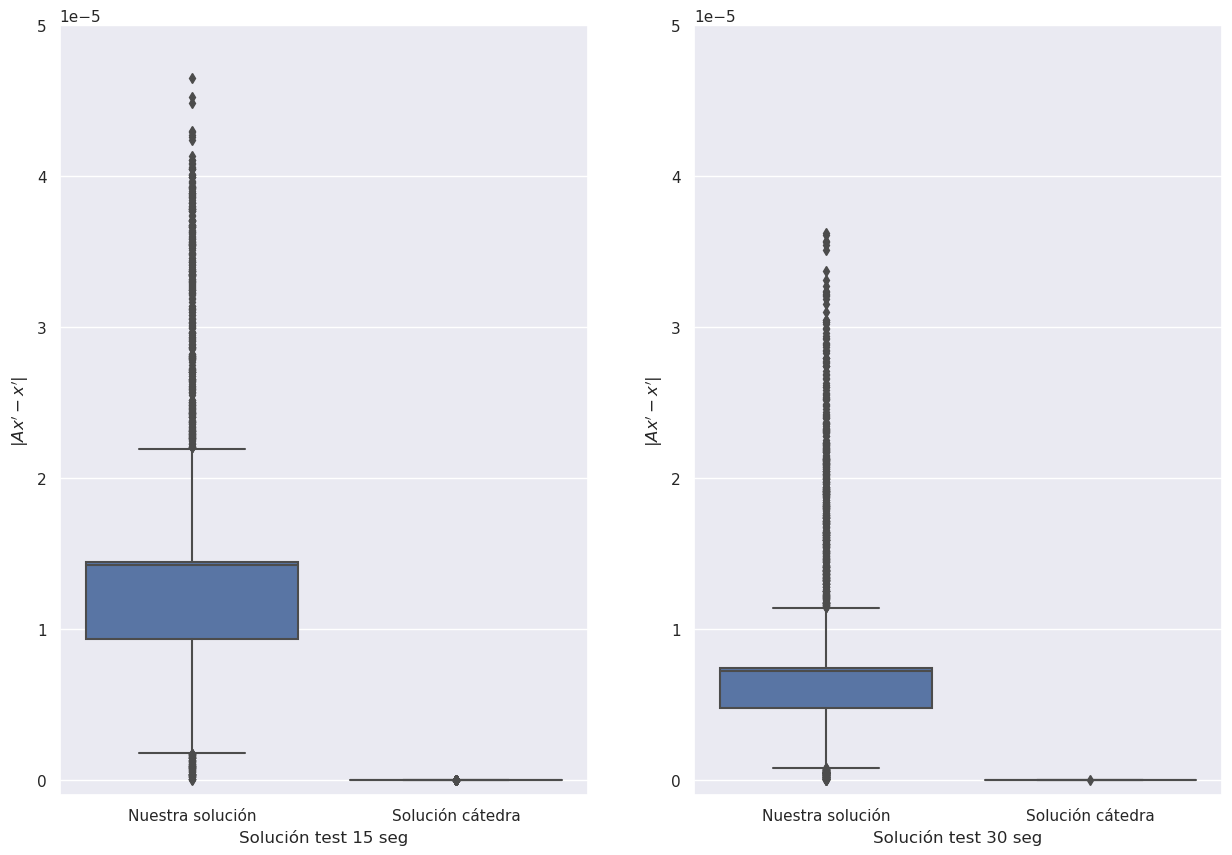

In [61]:
sb.set_theme()
fig, axes = matplotlib.pyplot.subplots(1, 2, figsize=(15,10))
left = sb.boxplot(combined_15,x="Resultados", y=1, ax=axes[0])
left.set(xlabel="Solución test 15 seg", ylabel="$|Ax'-x'|$")
axes[0].set_ylim((-1e-6, 5e-5))
right = sb.boxplot(combined_30,x="Resultados", y=1, ax=axes[1])
right.set(xlabel="Solución test 30 seg", ylabel="$|Ax'-x'|$")
axes[1].set_ylim((-1e-6, 5e-5))
#fig.set(xlabel="Ranking en función de p variable")
#matplotlib.pyplot.savefig('compare_a_times_x_15_and_30.svg')

In [83]:
## Queremos ver |Ax'-x'| cerca de 0
# Lo comento porque ya lo tengo
# test_15_segundos.solve_with_cpp(0.9)
diff_with_test =  test_15_segundos.diff_solution_with_A_times_x()


In [71]:
print(diff_with_test)

[1.44398685e-05 1.44399564e-05 1.44397149e-05 ... 8.87769649e-06
 3.05119283e-05 3.91963222e-05]


In [45]:
df_diff_15 = pd.DataFrame([(indx, diff) for (indx, diff) in enumerate(diff_with_test)])
df_diff_15

,0,1
0,0,0.000014
1,1,0.000014
2,2,0.000014
3,3,0.000014
4,4,0.000014
...,...,...
1995,1995,0.000039
1996,1996,0.000033
1997,1997,0.000009
1998,1998,0.000031


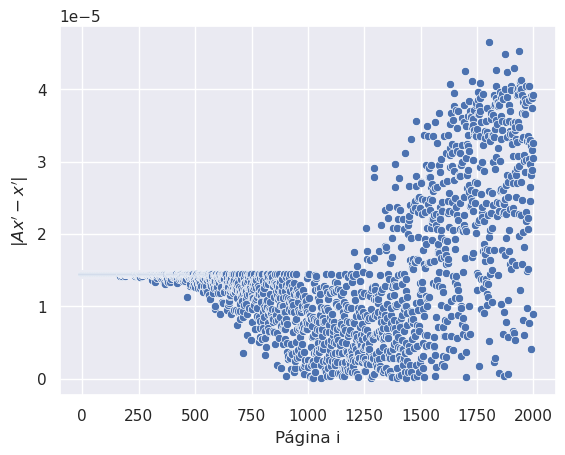

In [46]:
fig = sb.scatterplot(df_diff_15, x=0, y=1)
fig.set(xlabel="Página i", ylabel="$|Ax'-x'|$")
matplotlib.pyplot.savefig('ax_15_sec.png')
#fig = sb.lineplot(x=range(2000), y=1e-4)

## Test 1000 99

In [67]:
test_file_ours = os.getcwd() + f"/our_tests/0.9/50_99_1_sparseextra30.txt"
test_50 = read_test(test_file_ours, test_file_ours + ".out")

test_file_ours = os.getcwd() + f"/our_tests/0.9/100_99_1_sparseextra30.txt"
test_100 = read_test(test_file_ours, test_file_ours + ".out")

test_file_ours = os.getcwd() + f"/our_tests/0.9/300_99_1_sparseextra30.txt"
test_300 = read_test(test_file_ours, test_file_ours + ".out")

test_file_ours = os.getcwd() + f"/our_tests/0.9/500_99_1_sparseextra30.txt"
test_500 = read_test(test_file_ours, test_file_ours + ".out")

test_file_ours = os.getcwd() + f"/our_tests/0.9/1000_99_1_sparseextra30.txt"
test_1000 = read_test(test_file_ours, test_file_ours + ".out")

In [68]:
diff_with_test_1000 =  test_1000.diff_solution_with_A_times_x()

diff_with_test_500 =  test_500.diff_solution_with_A_times_x()

diff_with_test_300 =  test_300.diff_solution_with_A_times_x()

diff_with_test_100 =  test_100.diff_solution_with_A_times_x()

diff_with_test_50 =  test_50.diff_solution_with_A_times_x()

In [69]:
df_diff = pd.DataFrame([(indx, diff) for (indx, diff) in enumerate(diff_with_test_50)])
df_diff["n"] = "50"

df_diff_100 = pd.DataFrame([(indx, diff) for (indx, diff) in enumerate(diff_with_test_100)])
df_diff_100["n"] = "100"
df_diff = df_diff.merge(df_diff_100, how="outer")

df_diff_300 = pd.DataFrame([(indx, diff) for (indx, diff) in enumerate(diff_with_test_300)])
df_diff_300["n"] = "300"
df_diff = df_diff.merge(df_diff_300, how="outer")

df_diff_500 = pd.DataFrame([(indx, diff) for (indx, diff) in enumerate(diff_with_test_500)])
df_diff_500["n"] = "500"
df_diff = df_diff.merge(df_diff_500, how="outer")

df_diff_1000 = pd.DataFrame([(indx, diff) for (indx, diff) in enumerate(diff_with_test_1000)])
df_diff_1000["n"] = "1000"
df_diff = df_diff.merge(df_diff_1000, how="outer")

df_diff

,0,1,n
0,0,0.002127,50
1,1,0.001655,50
2,2,0.002390,50
3,3,0.007907,50
4,4,0.002724,50
...,...,...,...
1945,995,0.000031,1000
1946,996,0.000049,1000
1947,997,0.000076,1000
1948,998,0.000108,1000


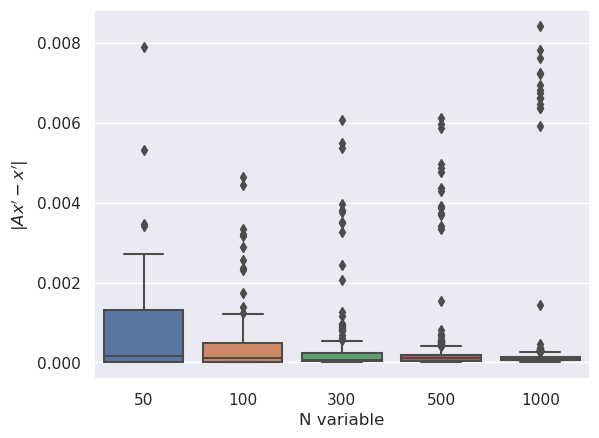

In [73]:
fig = sb.boxplot(df_diff, x="n", y=1)
fig.set(xlabel="N variable", ylabel="$|Ax'-x'|$")
#fig = sb.lineplot(x=range(1000), y=1e-4)
#fig.set_ylim((-1e-5, 0.002))
#matplotlib.pyplot.xscale("log")
matplotlib.pyplot.savefig('ax_n_variable.png')

## Test Error Absoluto

In [53]:
import os
tests_path = os.getcwd() + "/tests_catedra_original"
files = os.listdir(tests_path)
files = [file for file in files if file.endswith(".txt")]
tests = []
for file in files:
    test = read_test("./tests/" + file, "./tests_catedra_original/" + file)
    tests.append(test)

In [54]:
dataframes = []
for file in tests:
    print(file.test_path)
for i in range(len(tests)):
    df_tests_error = pd.DataFrame()
    p, our_solution = tests[i].solution_file()
    p, original_solution = tests[i].solution_file_original()
    name = tests[i].test_path.split('/')[-1]
    indices = [x for x in range(len(original_solution))]
    error = [abs(our_solution[x]-original_solution[x]) for x in range(len(original_solution))]
    df_tests_error["Error absoluto"] = error
    df_tests_error["Página i"] = indices
    df_tests_error["name"] = name
    dataframes.append(df_tests_error)


./tests/test_sin_links.txt
./tests/test_15_segundos.txt
./tests/test_30_segundos.txt
./tests/test_aleatorio.txt
./tests/test_aleatorio_desordenado.txt
./tests/test_trivial.txt
./tests/test_completo.txt


In [55]:
df_sin_links = dataframes[0]
df_15_segundos = dataframes[1]
df_30_segundos = dataframes[2]
df_aleatorio = dataframes[3]
df_desordenado = dataframes[4]
df_trivial = dataframes[5]
df_completo = dataframes[6]

In [65]:
df_15_segundos["Test"] = "15 segs"
df_30_segundos["Test"] = "30 segs"
combined = df_15_segundos.merge(df_30_segundos, how="outer")

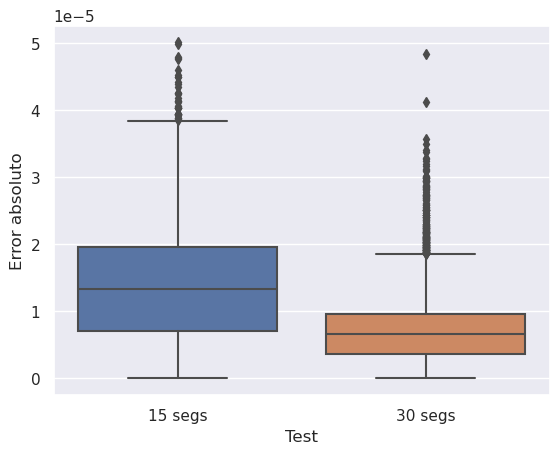

In [64]:
#fig = sb.lineplot(x=range(3000), y=1e-4, color="r", label="Limite aceptado: 1e-4")
fig = sb.boxplot(df_15_segundos,y="Duracion", x="Error absoluto")
#fig = sb.boxplot(df_30_segundos,y="Duracion", x="Error absoluto")
#matplotlib.pyplot.savefig("15_30_secs_error.svg")

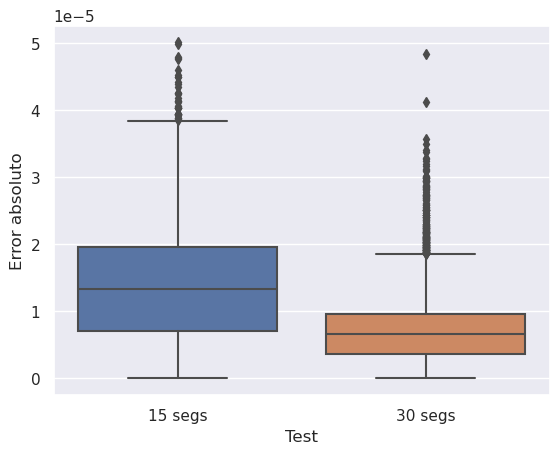

In [66]:
#fig = sb.lineplot(x=range(3000), y=1e-4, color="r", label="Limite aceptado: 1e-4")
fig = sb.boxplot(combined,x="Test", y="Error absoluto")
#fig = sb.boxplot(df_30_segundos,y="Duracion", x="Error absoluto")
matplotlib.pyplot.savefig("boxplot_15_30_secs_error.svg")

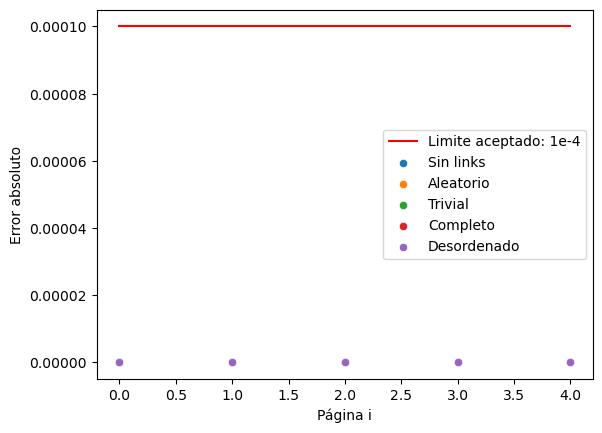

In [49]:
df_sin_links = dataframes[0]
df_15_segundos = dataframes[1]
df_30_segundos = dataframes[2]
df_aleatorio = dataframes[3]
df_desordenado = dataframes[4]
df_trivial = dataframes[5]
df_completo = dataframes[6]


fig = sb.lineplot(x=range(5),y=1e-4, color="r", label="Limite aceptado: 1e-4")
fig = sb.scatterplot(df_sin_links, x="Página i", y="Error absoluto", label= "Sin links")
fig = sb.scatterplot(df_aleatorio, x="Página i", y="Error absoluto", label= "Aleatorio")
fig = sb.scatterplot(df_trivial, x="Página i", y="Error absoluto", label= "Trivial")
fig = sb.scatterplot(df_completo, x="Página i", y="Error absoluto", label= "Completo")
fig = sb.scatterplot(df_desordenado, x="Página i", y="Error absoluto", label="Desordenado")

matplotlib.pyplot.savefig("error_absoluto.svg")